<a href="https://colab.research.google.com/github/zelestik/Big-open-data-labs/blob/main/%D0%9B%D0%A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


30.800639999999998
61.373279999999994
81.75504
178.5684
239.71368


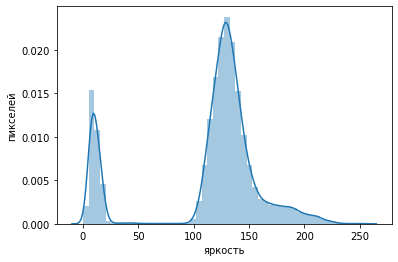

In [ ]:
from PIL import Image, ImageDraw 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as s
 
im = Image.open('plane.png', 'r')
# Список цветов для точек
imglist = list(im.getdata())
# Список яркостей
brlist = []
# Заполняем список яркостей
for img in imglist:
  brlist.append(img[0]*0.299 + img[1]*0.587 + img[2]*0.114)
# Data frame с яркостями
data = pd.DataFrame(brlist)
# Data frame с цветами (для формирования CSV)
dataRGB = pd.DataFrame(imglist, columns=["r", "g", "b"])
# Список для хранения отметок о принадлежности точки к категории
labels = []
# Построение графика
plt.figure()
plt.xlabel("яркость")
plt.ylabel("пикселей")
gr = sns.distplot(data)
# Список столбцов гистограммы 
barsX = []
# Список высот столбцов гистограммы
barsY = []
# Проходим все столбцы гистограммы
for rect in gr.patches:
  ((x0, y0), (x1, y1)) = rect.get_bbox().get_points()
  barsX.append(x0)
  barsY.append(y1-y0)
# Список локальных минимумов
mins = np.array(s.argrelmin(np.array(barsY)))[0]
# Отнесение точек к категориям, задание цвета
for i in range(0, len(brlist)):
  if ((brlist[i] > (barsX[mins[2]])) and (brlist[i] < (barsX[mins[3]]))):
    labels.append(1)
  elif ((brlist[i] > (0)) and (brlist[i] < (barsX[mins[1]]))):
    # Закрашиваем наиболее темную область (самолёт)
    imglist[i]= (255, 0, 0)
    labels.append(2)
  elif ((brlist[i] > (barsX[mins[3]])) and (brlist[i] < (barsX[mins[4]]))):
    labels.append(3)
  else:
    labels.append(0)
for min in mins:
  print(barsX[min])
dataRGB['label']=labels
dataRGB.to_csv("rgb.csv")
im.close()
im = Image.new('RGB', (1180, 730), (0, 0, 0))
draw = ImageDraw.Draw(im)
g = 0
for i in range (0, 730):
  for j in range (0, 1180):
    draw.point([j, i], fill=imglist[g])
    g = g + 1
im.save("RedPlane.png")